# Single degree of freedom spring-slider system 

<img src="https://ai4eps.github.io/EPS207_Observational_Seismology/lectures/assets/Screenshot%202023-08-23%20at%2022.53.46.png" style="width:600px;"/>

(P333, Segal 2010)

\begin{align} 
\tau &=\tau_0 - n V - \kappa \delta \\ 
η &= \frac{\mu}{2c} \\
\kappa &= \frac{2\mu}{\pi L} \\
\end{align}

$$
\tau_{lock} = \tau_0 - \kappa \delta \\
$$
$$
\tau_{str}(\delta)= \begin{cases}\tau_p-\left(\tau_p-\tau_r\right) \delta / D_c, & \delta \le D_c \\ \tau_r & \delta>D_c\end{cases}
$$


\begin{align}
f &= f_s - (f_s - f_d) * \min(\delta, D_c) / D_c \nonumber \\
\tau_{str} &= f \cdot σ_n \nonumber
\end{align}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
L = 1                   #fault length (m)
μ = 30e3                #shear modulus (MPa)
c = 3e3                 #shear wave speed (m/s)
π = np.pi
κ = 2.0 * μ / (π * L)   #stiffness (MPa/m)
η = 0.5 * μ / c         #radiation-damping coefficient

In [3]:
fs = 0.8        #static friction coefficient
fd = 0.7        #dynamic friction coefficient
Dc = 10e-6      #slip weakening distance (m)

In [4]:
σn = 100.0      #effective normal stress (MPa)
τ0 = fs * σn    #initial shear stress (MPa)
dτdt = 1e-6     #shear stress rate (MPa/s)

In [5]:
δ = np.linspace(0, 2 * Dc, 100)                 #slip (m)
f = fs - (fs - fd) * np.minimum(δ, Dc) / Dc     #slip-weakening friction
τ_str = f * σn                                  #fault strength (MPa)

Text(0, 0.5, 'Fault strength (τ_str)')

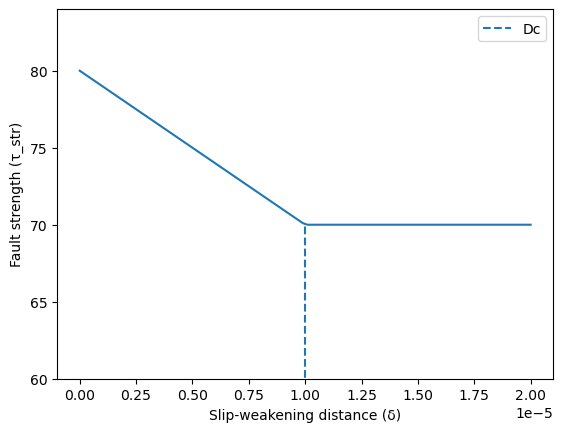

In [6]:
plt.figure()
plt.plot(δ, τ_str)
plt.vlines(Dc, 0, fd * σn, linestyle="--", label="Dc")
plt.legend()
plt.ylim(60)
plt.xlabel("Slip-weakening distance (δ)")
plt.ylabel("Fault strength (τ_str)")

In [12]:
v_max = (fs - fd) * σn / η
τ_min = fd * σn
τ_max = fs * σn
δ_max = (τ_max - τ_min) / κ
t_max = η / κ * 2.0

nt = 10000
dt = 1e-7

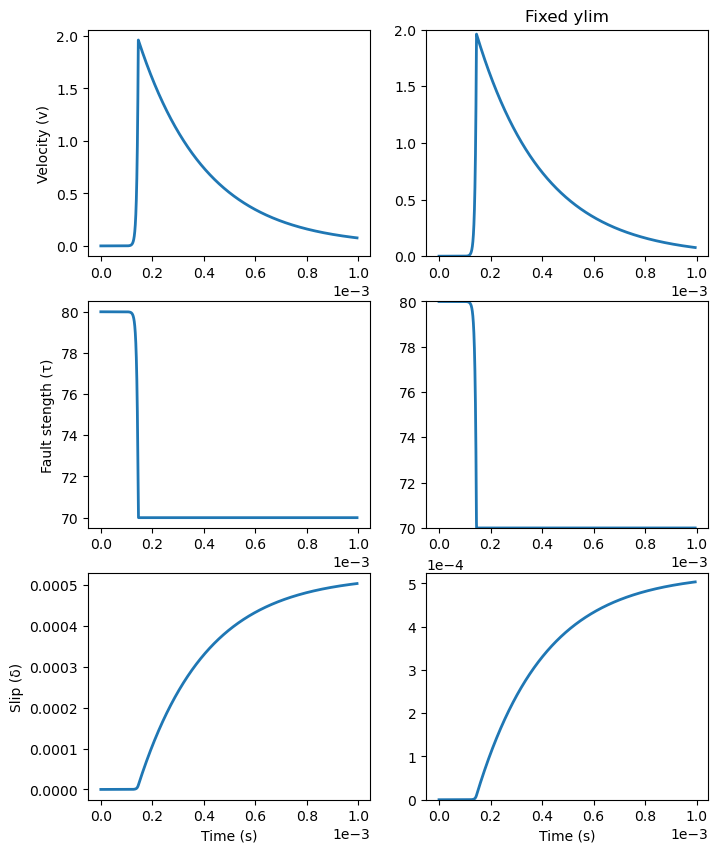

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(8, 10))
t_hist = []
τ_hist = []
v_hist = []
δ_hist = []

δ = 0
for i in range(nt):

    τ0 += dτdt * dt
    Δτ = -κ * δ
    τ_lock = τ0 + Δτ

    f = fs - (fs - fd) * min(δ, Dc) / Dc
    τ_str = f * σn

    if τ_lock < τ_str:
        τ = τ_lock
        v = 0
    else:
        τ = τ_str
        v = -(τ_str - τ_lock) / η

    δ = δ + dt * v
    t_hist.append(i * dt)
    τ_hist.append(τ)
    v_hist.append(v)
    δ_hist.append(δ)

    if i % 50 == 0:
        [axi.clear() for axi in ax.ravel()]
        ax[0, 0].plot(t_hist, v_hist, lw=2)
        ax[0, 1].plot(t_hist, v_hist, lw=2)
        ax[0, 1].set_ylim(0, v_max)
        ax[0, 1].set_title("Fixed ylim")
        ax[0, 0].set_ylabel("Velocity (v)")
        ax[1, 0].plot(t_hist, τ_hist, lw=2)
        ax[1, 1].plot(t_hist, τ_hist, lw=2)
        ax[1, 1].set_ylim(τ_min, τ_max)
        ax[1, 0].set_ylabel("Fault stength (τ)")
        ax[2, 0].plot(t_hist, δ_hist, lw=2)
        ax[2, 1].plot(t_hist, δ_hist, lw=2)
        ax[2, 1].set_ylim(0, δ_max)
        ax[2, 0].set_ylabel("Slip (δ)")
        ax[2, 1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
        [axi.ticklabel_format(style="sci", axis="x", scilimits=(0, 0)) for axi in ax.ravel()]
        ax[2, 0].set_xlabel("Time (s)")
        ax[2, 1].set_xlabel("Time (s)")
        
        display(fig)
        clear_output(wait=True)
